In [1]:
%load_ext watermark
%watermark

Last updated: 2023-06-27T15:15:53.107878-05:00

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib `matplotlib notebook`, es muy util para hacer plots mas visibles, pero es un poco complicada de usar ya que requiere el cerrar cada plot para poder continuar.

Alternativamente, se puede usar `%matplotlib inline`, que es más sencilla ya que simplemente muestra el gráfico original en el jupyter notebook. Para modificar el tamaño de los plots en este caso basta con cambiar el parámetro general de matplotlib `figure.figsize` al tamaño de gráfico deseado  (en pulgadas)

In [3]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,10) # 10 pulgadas de ancho y 10 de alto para todos los plots

### Lectura de datos

In [4]:
df_consumo = pd.read_pickle("Data/df_consumo.3.variables_agrupadas.pkl")

In [5]:
df_consumo.dtypes

directorio                              int64
per_sexo                                int64
per_edad                                int64
vive_padre_hogar                        int64
vive_madre_hogar                        int64
                                       ...   
situacion_tipo                       category
frecuencia_consumo_marihuana_tipo    category
frecuencia_consumo_cocaina_tipo      category
frecuencia_consumo_basuco_tipo       category
frecuencia_consumo_heroina_tipo      category
Length: 63, dtype: object

Vemos que al leer de un dataframe pickled, pandas no tiene que averiguar de nuevo que tipo de dato es cada columna, lo carga todo en memoria directamente.

In [6]:
df_consumo.head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,estrato,residentes_hogar,...,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m,per_edad_tipo,estrato_tipo,situacion_tipo,frecuencia_consumo_marihuana_tipo,frecuencia_consumo_cocaina_tipo,frecuencia_consumo_basuco_tipo,frecuencia_consumo_heroina_tipo
0,11207,1,19,2,2,Guaviare,SAN JOSÉ DEL GUAVIARE,2,2.0,5,...,NaN,NaN,NaN,Joven,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1.0,4,...,NaN,NaN,NaN,Adulto,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
2,4398,1,52,3,3,Caqueta,FLORENCIA,1,2.0,4,...,NaN,NaN,NaN,Adulto,Estrato bajo,Trabajando,Nunca,Nunca,Nunca,Nunca
3,4399,2,39,1,1,Bolivar,CARTAGENA,1,5.0,6,...,NaN,NaN,NaN,Adulto,Estrato alto,Trabajando,Nunca,Nunca,Nunca,Nunca
4,2619,2,27,1,1,Tolima,ESPINAL,1,2.0,4,...,NaN,NaN,NaN,Joven,Estrato bajo,Buscando trabajo,Nunca,Nunca,Nunca,Nunca


In [7]:
from ipywidgets import interact, fixed

### Recuento por multiples grupos

In [8]:
def pivot_recuento(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [9]:
df_consumo_ = pivot_recuento(df_consumo,"estrato_tipo","d_02_situacion_actual","directorio")
df_consumo_

d_02_situacion_actual,1,2,3,4,5,6,7,8
estrato_tipo,,,,,,,,
Estrato alto,187,3,43,21,2,12,5,5
Estrato bajo,3860,397,782,1250,56,63,122,90
Estrato medio,1911,141,472,370,23,97,49,39


In [10]:
def heatmap_recuento_tipos(df, col1, col2):
    pivot_table = pivot_recuento(df,col1, col2, "directorio")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('directorio', 'per_sexo', 'per_edad', 'vive_padre_…

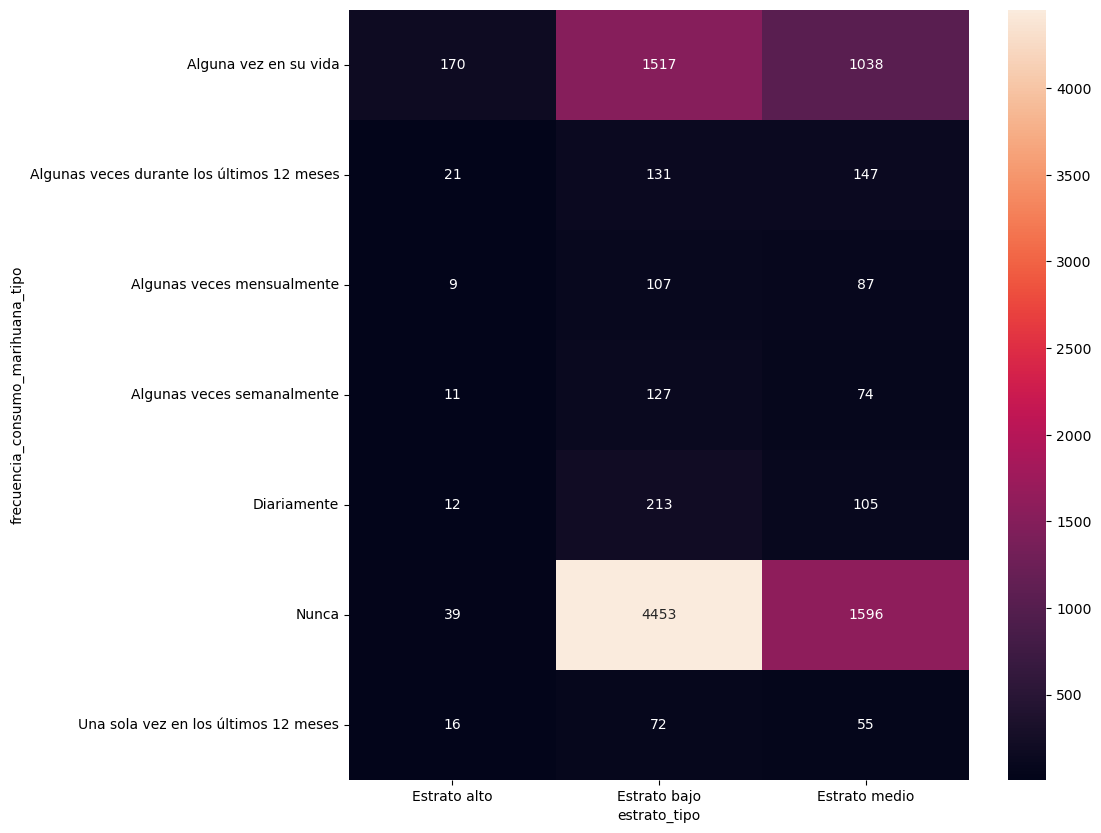

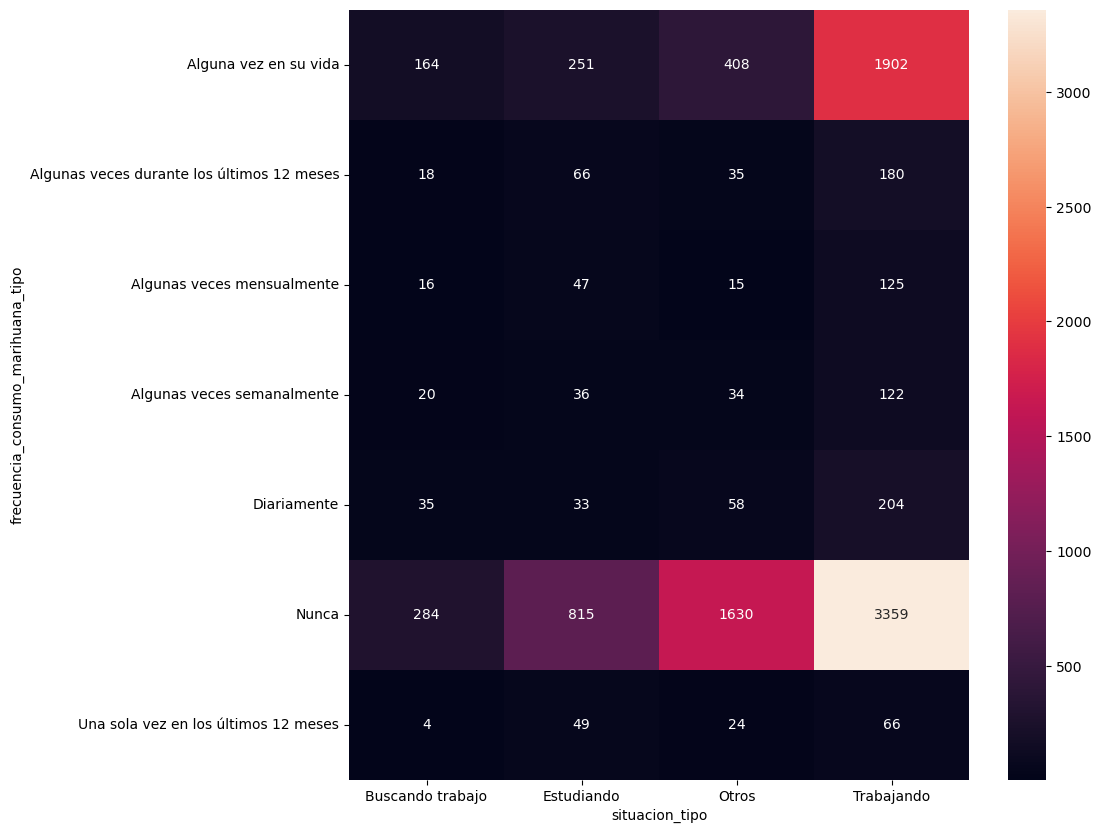

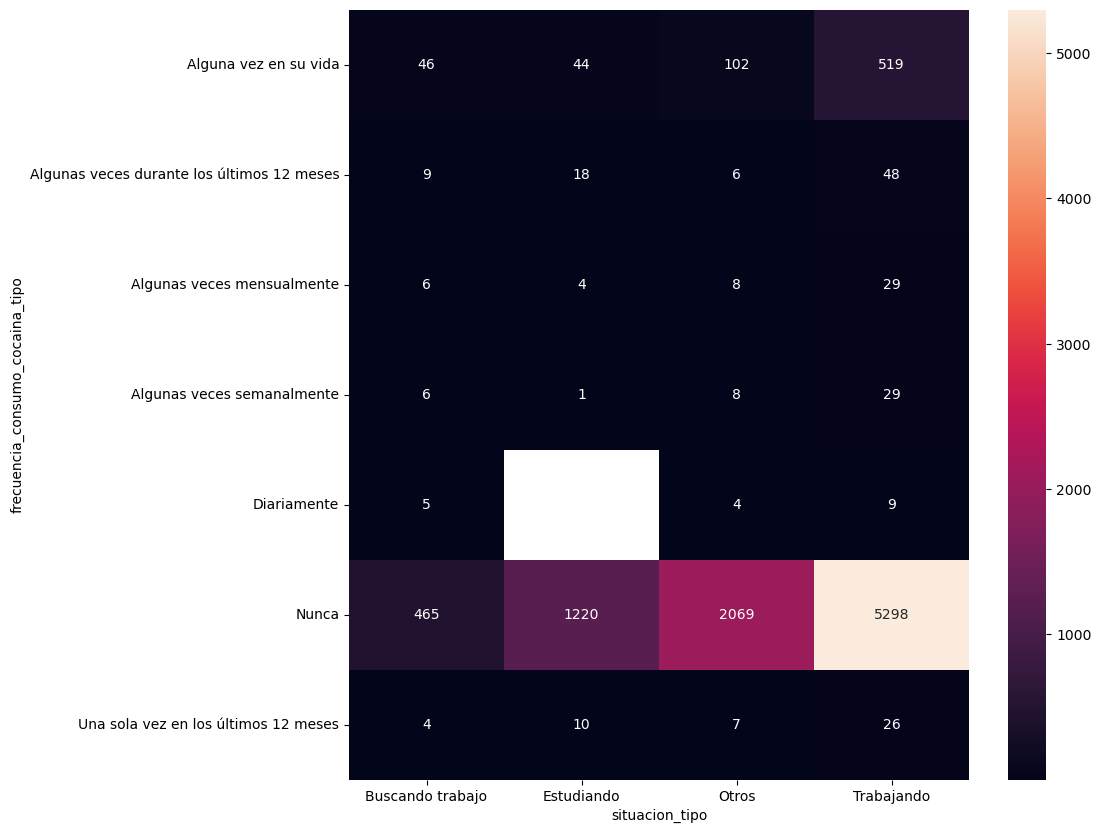

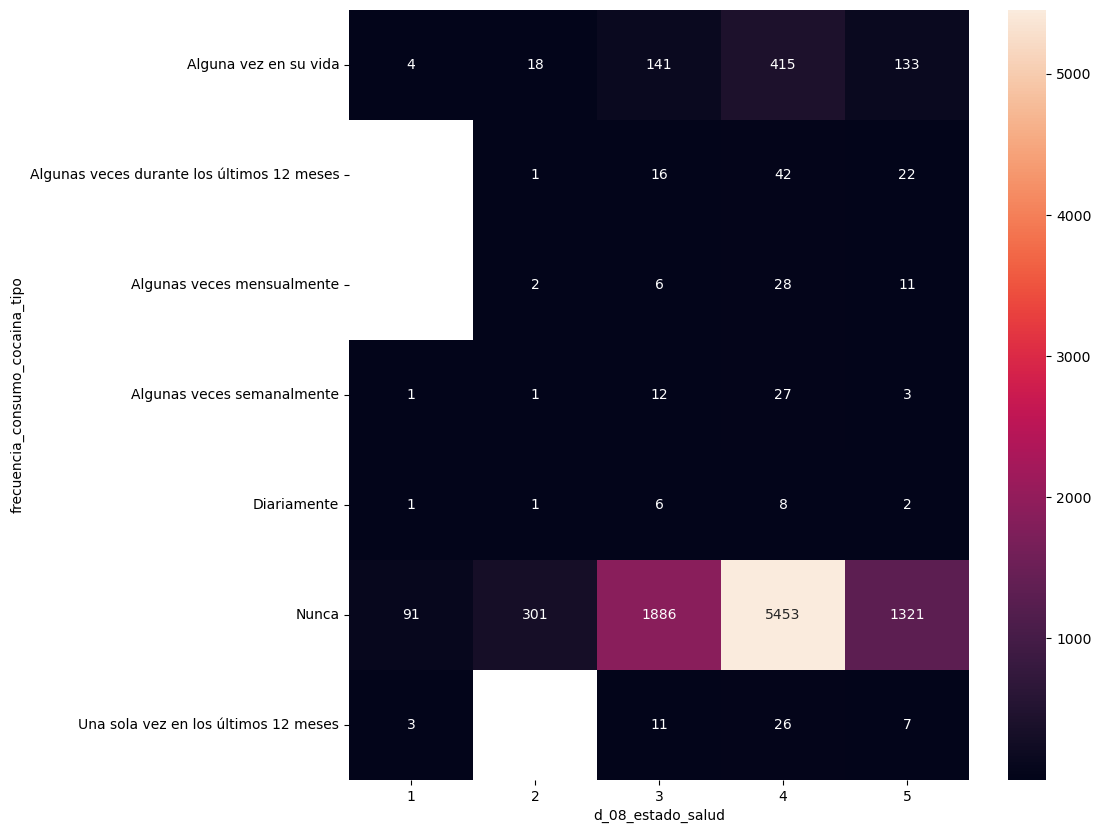

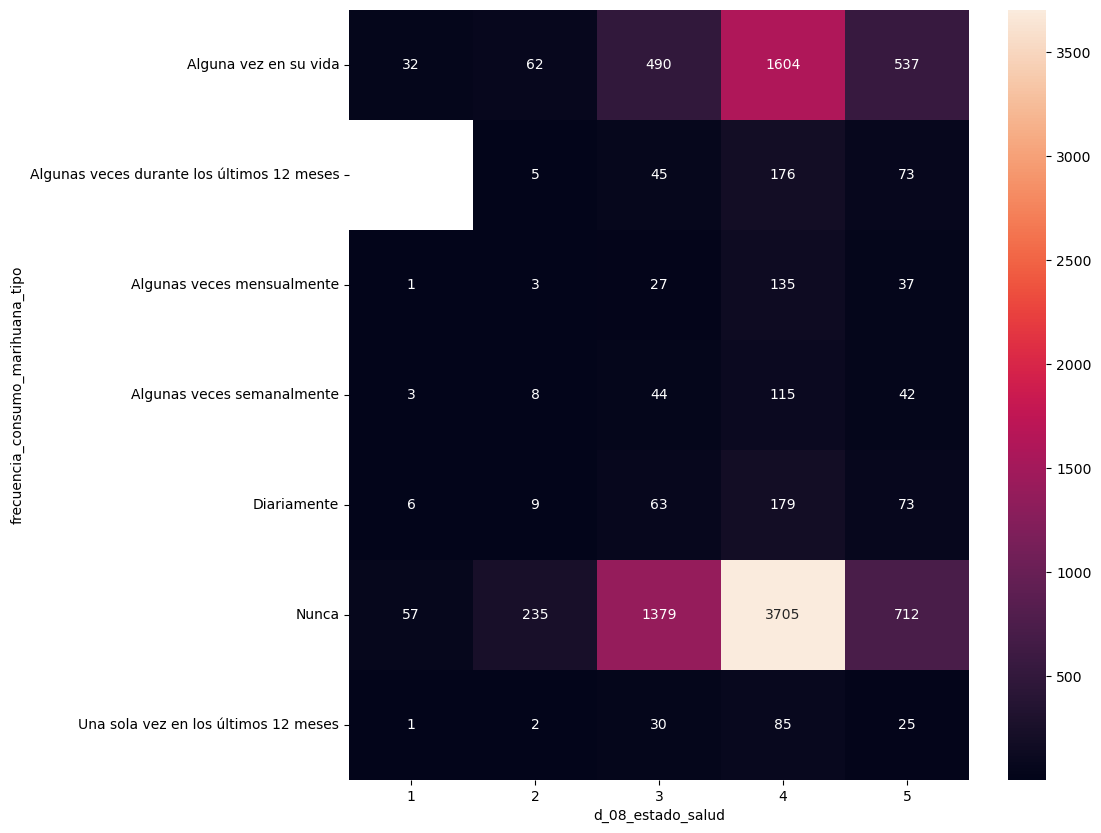

In [11]:
interact(heatmap_recuento_tipos, col1=df_consumo.columns, col2=df_consumo.columns, df=fixed(df_consumo));

### Conclusiones

- Se utilizo la variable directorio como conteo general
- En el estrato bajo se ve una mayor tendencia de consumo de marihuana con respecto a otros estratos.
- La encuesta tiene mas ejemplos de personas que nunca han consumido sustancias a las que si lo han hecho con casos como marihuana, cocaina, heroina y bazuco.
- Se analiza que el consumo de marihuana está mas relacionado con personas que están trabajando para todas las frecuencias de consumo.

### Medias por variables categóricas (En principio no aplicaría por lo que son todas categoricas)

In [14]:
def medias_por_categoria(col_grupo, col_calculo):
    df_consumo.groupby(col_grupo)[col_calculo].mean().plot.barh()
    plt.ylabel(col_grupo)
    plt.xlabel('Valores medios de {}'.format(col_calculo))
    plt.show()

In [15]:
columnas_numericas = df_consumo.select_dtypes(['int', 'float']).columns
columnas_categoricas = df_consumo.select_dtypes(['object', 'category']).columns
columnas_tipo = [col for col in df_consumo.columns if col.endswith("_tipo")]

In [16]:
interact(medias_por_categoria, col_grupo=columnas_categoricas, col_calculo=columnas_numericas);

interactive(children=(Dropdown(description='col_grupo', options=('departamento', 'municipio', 'per_edad_tipo',…

### Medias por multiples tipos

In [17]:
def pivot_media(rows, columns, calc_field):
    df_pivot = df_consumo.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.mean
                             ).dropna(axis=0, how='all')
    return df_pivot

In [18]:
pivot_media("frecuencia_consumo_marihuana_tipo","situacion_tipo", "directorio")

situacion_tipo,Buscando trabajo,Estudiando,Otros,Trabajando
frecuencia_consumo_marihuana_tipo,,,,
Alguna vez en su vida,34003.603659,32796.262948,31258.056373,31713.619348
Algunas veces durante los últimos 12 meses,32810.333333,33814.969697,28653.028571,33404.194444
Algunas veces mensualmente,27207.562500,34111.744681,34284.400000,36197.320000
Algunas veces semanalmente,36812.950000,33962.361111,30235.294118,32975.204918
Diariamente,37348.000000,34437.515152,30782.224138,32341.313725
Nunca,8032.764085,7316.122699,7382.371779,7853.121167
Una sola vez en los últimos 12 meses,16293.250000,30918.244898,29296.250000,29004.984848


In [19]:
def heatmap_medias_tipos(col1, col2, col3):
    pivot_table = pivot_media(col1, col2, col3)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('directorio', 'per_sexo', 'per_edad', 'vive_padre_…

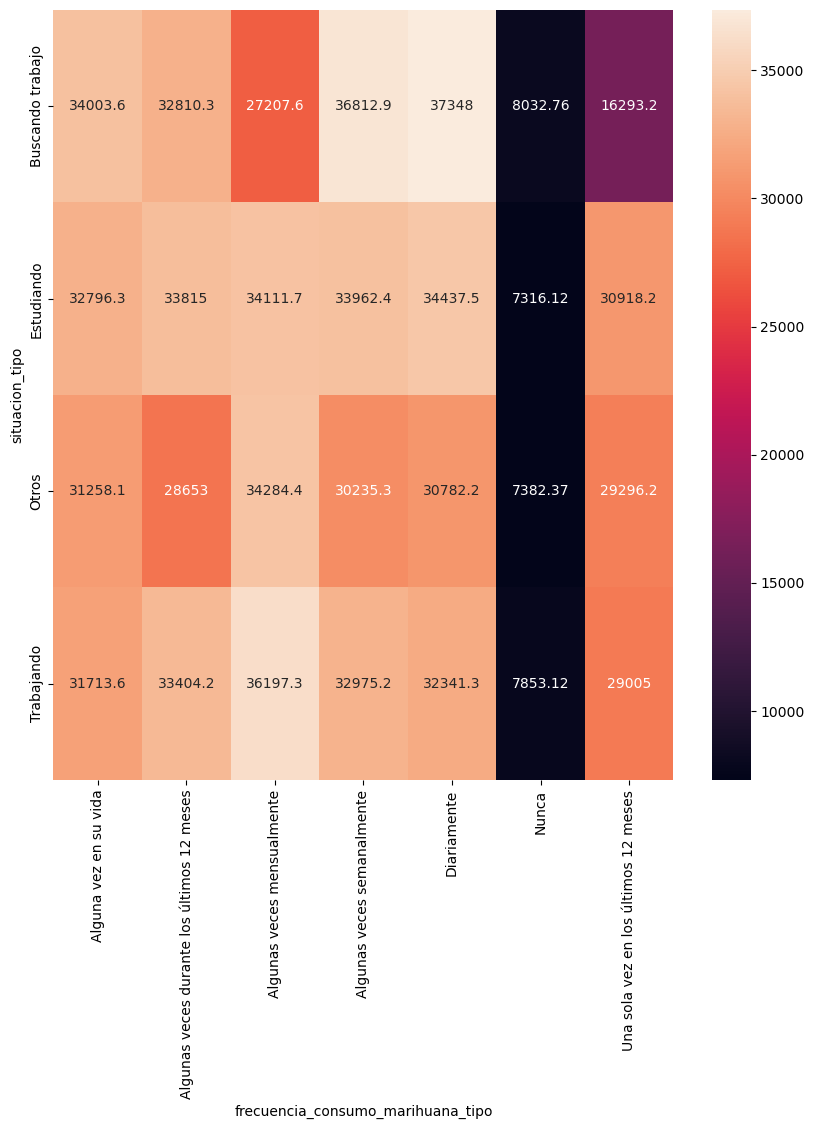

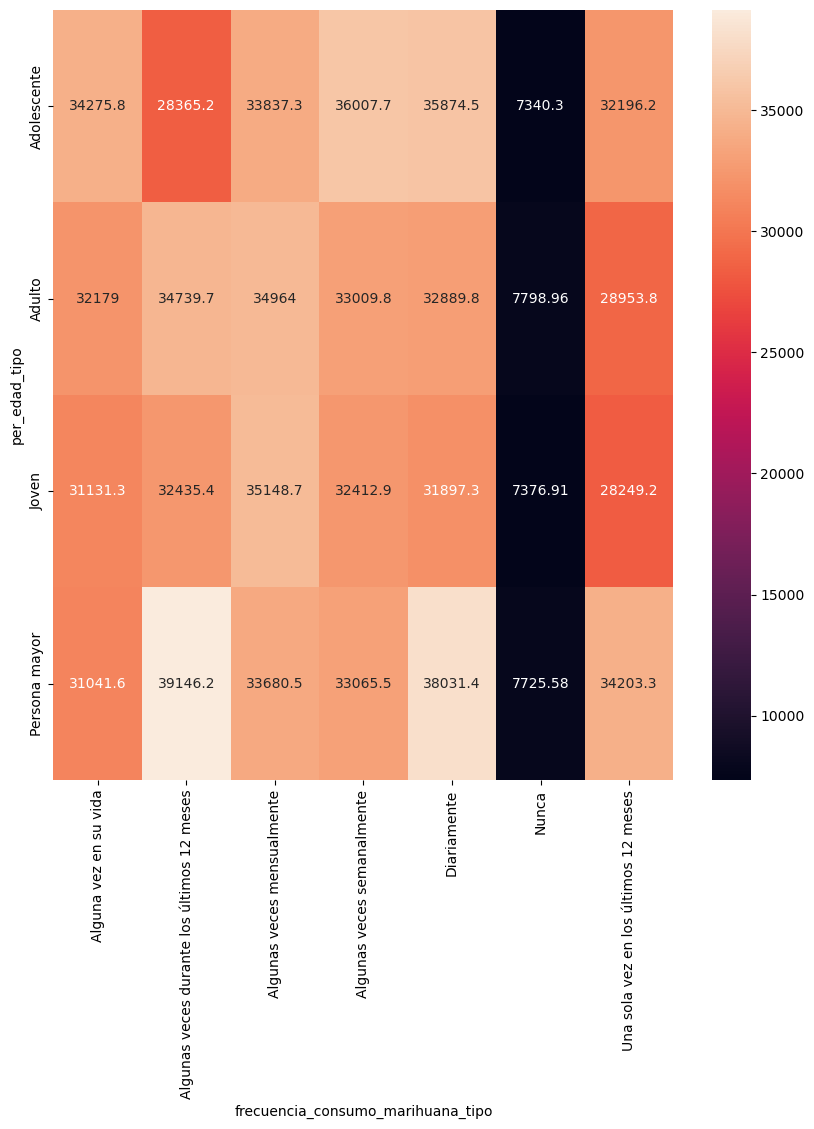

In [20]:
interact(heatmap_medias_tipos, col1=df_consumo.columns, col2=df_consumo.columns, col3=columnas_numericas);

#### Conclusiones

- Hay un porcentaje mayor en adolescentes que consumen semanalmente respecto a otros tipos de edades
- Las personas mayores manifestaron menor consumo, sin embargo la segunda tendencia es que consumen diariamente

### Comparacion de tendencias (temporales) (En teoría no aplicaría ya que no disponemos de datos en el tiempo)

Una vez hemos terminado el análisis, el paso final es compilar toda la información obtenida en un documento. Dicho documento tiene dos objetivos principales:

- Informar a aquellas personas interesadas de los descubrimientos encontrados. ¿Esto nos incluye a nosotros mismos en el futuro!
- Facilitar la replicación del análisis por otros Data Scientists.